# Image Information

The main objectives of this module are:

* Manipulate an image with Python, scikit-image and numpy.
* Process images at the pixel level.
* Compute and understand image histograms.
* Understand lossless compression & reconstruction.
* Understand the co-occurrence matrix.
* Use different colour representations.

## 1. Read & write an image

In this exercise, we will simply open an image file, display it, and save a copy. 

**Use the [scikit-image io](https://scikit-image.org/docs/dev/api/skimage.io.html) module to open, show & save a copy of the "camera.jpg" image.**

*Note: we use the **%matplotlib inline** command to display the image in the notebook. It would not be necessary if you execute the code in the terminal or in a standard IDE like PyCharm.*

[[156 157 158 ... 151 151 151]
 [159 158 157 ... 152 152 152]
 [161 159 157 ... 154 154 154]
 ...
 [121 123 127 ... 123 113 107]
 [121 122 123 ... 123 116 112]
 [120 124 127 ... 121 116 115]]


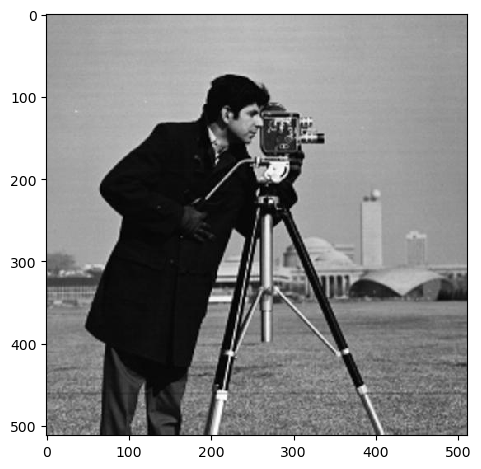

In [1]:
from skimage.io import imread,imsave,imshow
%matplotlib inline
from matplotlib import pyplot as plt

im = imread('camera.jpg')
imshow(im)
print(im)
imsave('camera_copy.jpg',im)


When you open an image with scikit-image, it is stored as a Numpy [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) object. Numpy arrays are objects which can be easily manipulated for numerical computations.

**Using *ndarray* methods & attributes, answer the following questions about the "camera" image:**

1. What is the shape of the image? (width & height)
2. What is the minimum pixel value? What is the maximum pixel value?
3. What is the data type for each pixel?
4. Show only a 100x100 pixels window taken at the center of the image.

(512, 512)
0 255
<class 'numpy.ndarray'>
158 <class 'numpy.uint8'>


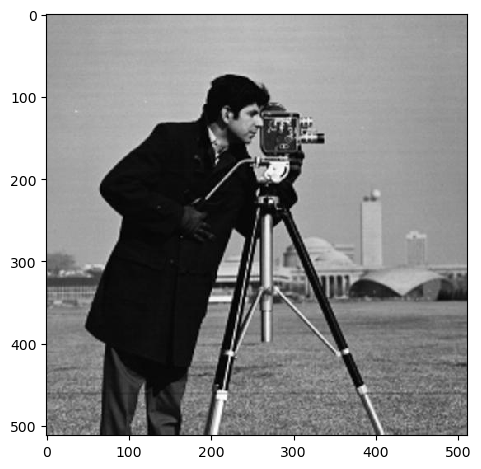

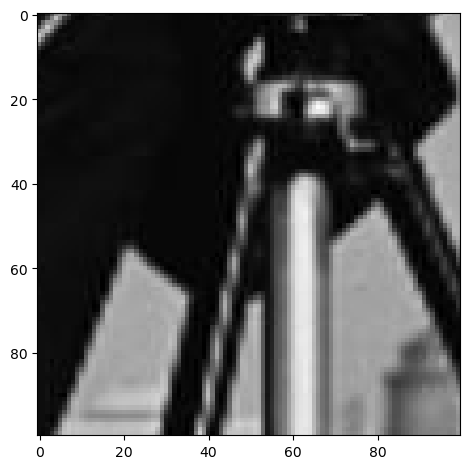

In [11]:
import numpy as np
#Ex1
print(im.shape)
#Ex2
print(im.min(),im.max())
#Ex3
for index_line, line in enumerate(im):
    if index_line%1000 == 1:
        print(type(line))
        for index_pixel, pixel in enumerate(line):
            if index_pixel%1000 == 1:
                print(pixel, type(pixel)) #Pourquoi on n'a pas la valeur de bleu/rouge/vert?Parce que im est gris
#Ex4
from matplotlib import pyplot as plt
h = np.zeros((100,100)) #100lignes de 100 colonnes
y_range = [(im.shape[0]//2)-50,(im.shape[0]//2)+50]
x_range = [(im.shape[1]//2)-50,(im.shape[1]//2)+50]
center = im[y_range[0]:y_range[1],x_range[0]:x_range[1]]

plt.figure()
imshow(im)
plt.figure()
imshow(center)



**Need more help? You can check the following videos:**

* [Image I/O](https://www.youtube.com/watch?v=rgJmji4rTpw&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=1)
* [Image data type & color channels](https://www.youtube.com/watch?v=rIO1EJ--yeg&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=2)

## 2. Image histograms

* Compute and plot the **histogram** and the **normalized histogram** of the example cameraman image given below.

You can use the [pyplot module](https://matplotlib.org/api/pyplot_api.html) from matplotlib to display plots & histograms.

[207, 90, 143, 184, 247, 365, 617, 1408, 3236, 4657, 3874, 5044, 5873, 6107, 6026, 4381, 2902, 1504, 861, 648, 566, 506, 479, 459, 397, 398, 390, 397, 360, 370, 333, 389, 368, 366, 385, 395, 359, 363, 408, 354, 334, 365, 364, 326, 307, 277, 255, 295, 261, 250, 249, 271, 259, 270, 254, 301, 279, 277, 316, 295, 310, 333, 330, 340, 313, 269, 255, 241, 229, 248, 234, 216, 222, 243, 220, 222, 198, 188, 204, 209, 234, 216, 235, 210, 257, 250, 239, 274, 312, 291, 303, 334, 371, 394, 429, 461, 490, 517, 571, 577, 628, 698, 735, 789, 791, 834, 884, 951, 1037, 1020, 1017, 1104, 1109, 1201, 1210, 1273, 1279, 1352, 1339, 1415, 1501, 1495, 1518, 1549, 1554, 1631, 1636, 1670, 1712, 1705, 1771, 1626, 1664, 1634, 1585, 1713, 1566, 1559, 1487, 1397, 1501, 1346, 1412, 1471, 1629, 1888, 2007, 2041, 2126, 2239, 2272, 2076, 2086, 2165, 2107, 2491, 2675, 2807, 3016, 3348, 3584, 4228, 4884, 4848, 4794, 4463, 4193, 4014, 3694, 3308, 2936, 2724, 2752, 2616, 2556, 2584, 2590, 2654, 2789, 2723, 2815, 2696, 2553,

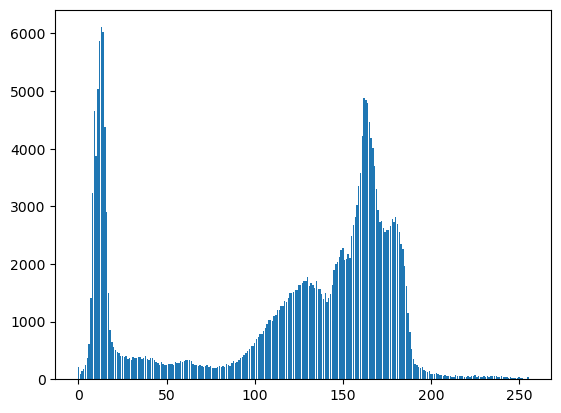

In [12]:
from matplotlib import pyplot as plt

"""
#Intuitive way
h=[0 for i in range(256)]
for y in range(im.shape[0]):
    for x in range(im.shape[1]):
        h[im[y,x]]+=1 #Chaque fois que l'on tombe sur la même couleur, on a le même indice à incrémenter
"""
histogram=[(im==v).sum() for v in range(256)] #More efficient and compact
print(histogram)
plt.figure()
plt.bar(range(256),histogram) #show with bars
#plt.plot(histogram)
plt.show()
#Really high x_value means to be bright


Can you use the histogram to answer the following questions ? (you don't need to code anything here)

1. What is the average gray value of the cameraman ?
2. What is the average gray value of the sky ?
3. Is there more 'cameraman' pixels than 'sky' pixels ?

In [2]:
"""
1. cameran_average_gray_value = 12, read from histogram
2. sky_average_gray_value = 160, read from histogram
3. as the number of pixel is given by the integral, there are more sky pixels
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def show_normalized_histogram(image):
    # Normalized histogram
    histogram=[(image==v).sum() for v in range(256)]
    h = np.array(histogram)
    norm_h = h/h.sum() #h.sum() compute the sum of all array's values. It allows to normalize
    plt.figure()
    plt.bar(range(256),norm_h)
    plt.show()
    return norm_h

def show_image(image, my_cmap = cm.gray):
    plt.imshow(image,interpolation='nearest',cmap=my_cmap,vmin=image.min()+1, vmax=image.max()-1)
    plt.colorbar()
    plt.show()
    
norm_h = show_normalized_histogram(im)
# Cumulated histogram
h_cumul = np.zeros(256)
for i in range(256):
    h_cumul[i] = norm_h[i]+h_cumul[i-1] #When i=0, h_cumul[0] = norm_h[0]+h_cumul[-1] where h_cumul[-1]=0
                                            #because of the way we def. h_cumul
plt.figure()
plt.bar(range(256),h_cumul)
plt.show()

NameError: name 'cm' is not defined

Compute and plot the **cumulated histogram**.

**Need more help? You can check the following videos:**

* [Computing a greyscale histogram](https://www.youtube.com/watch?v=g6hkHQbwB0I&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=3)
* [Numpy arrays: operations, indexing, masking](https://www.youtube.com/watch?v=rPNTkrM2dZw&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=4&t=253s)
* [Normalized and cumulative histograms](https://www.youtube.com/watch?v=uCgu0-KZt1o&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=5)

## 3. Image entropy

The "entropy" of a signal, in information theory, can generally be interpreted as the "number of bits required to encode the signal". It is a measure of the "amount of information" contained in the signal. Intuitively, a signal with a very narrow distribution (all values are close to each other) will have a very low entropy, while a signal with a wide distribution (the values are evenly distributed) will have a higher entropy.

1. Compute the image entropy of the cameraman image. The image entropy is given by $e = - \sum_{g=0}^N p(g) \log_2(p(g))$ where $p(g)$ is the probability that a pixel has the grayscale value g, and N is the number of possible grayscale values. Note that p(g) is directly given by the normalized histogram.
1. What is the entropy of a shuffled version of the cameraman ?

In [14]:
import numpy as np
from matplotlib import pyplot as plt
def entropy(im, name = ''):
    #normalised histogram
    h = [(im==v).sum() for v in range(256)] #Probability to get a gray lvl
    p = np.array(h)
    p = p/p.sum()

    #entropy computation
    e = -(p[p>0]*np.log2(p[p>0])).sum() #[p>0] to be sure to not compute log(p<0)
    if name == '':
        print("La valeur de l'entropie de cette image vaut :", e, "\n")
    else:
        print("La valeur de l'entropie de",name,"vaut :", e, "\n")
    return e

entropy_value = entropy(im)

La valeur de l'entropie de cette image vaut : 7.065452040742867 



**Need more help? You can check the following videos:**

* [Computing the image entropy](https://www.youtube.com/watch?v=L2VtGt2FsRQ&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=6)

## 4. Image compression

Using the code below as a starting point:

* **Decompose an image** by recursively subsampling its dimensions and computing the remainders, such that each level of recursion performs the following operation:

<img src='PyramidCompression.png' width='75%'/>

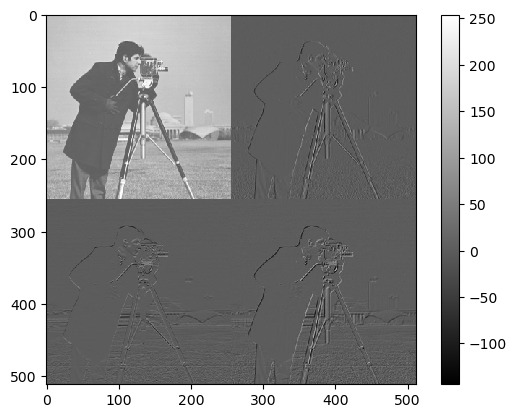

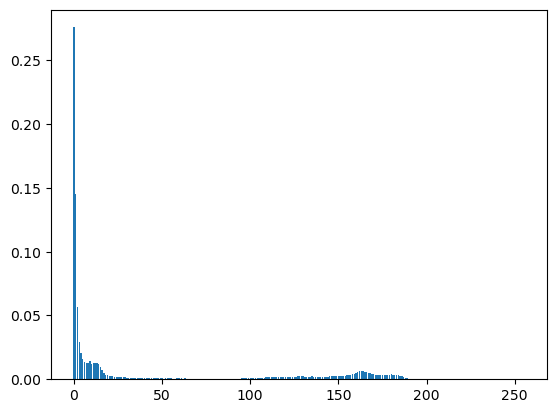

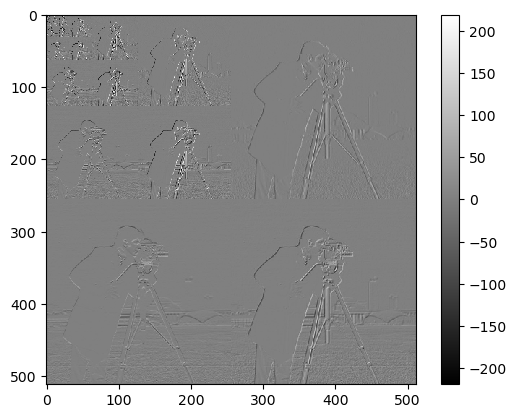

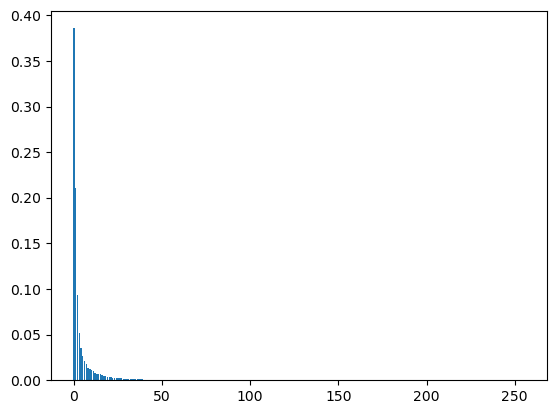

'\nplt.figure(figsize=(12,12))\n# interpolation=\'nearest\' -> don\'t try to interpolate values between pixels if the size of the display is different from the size of the image\n# cmap=cm.gray -> display in grayscale\n# vmin=-255 -> set "black" as -255\n# vmax=255 -> set "white" as 255\nplt.imshow(s,interpolation=\'nearest\',cmap=cm.gray,vmin=-255, vmax=255)\nplt.colorbar()\n\nplt.show()\n'

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.io import imread

# Modify this method:
def split(im):
    a = im[0:-1:2,0:-1:2] #1,3,9,11
    b = im[0:-1:2,1::2]-a #5,7,13,15
    c = im[1::2,0:-1:2]-a #2,4,10,12
    d = im[1::2,1::2]-a #6,8,14,16
    
    #First line is made of block a,b. The second one is made of blocks c,d
    R = np.vstack((np.hstack((a,b)),np.hstack((c,d))))
    return R

def split_recursive(im):
    if (im.shape[0]%2!=0 or im.shape[1]%2!=0): return im;
    a = im[0:-1:2,0:-1:2] #1,3,9,11
    b = im[0:-1:2,1::2]-a #5,7,13,15
    c = im[1::2,0:-1:2]-a #2,4,10,12
    d = im[1::2,1::2]-a #6,8,14,16
    
    #First line is made of block a,b. The second one is made of blocks c,d
    R = np.vstack((np.hstack((split_recursive(a),b)),np.hstack((c,d))))
    return R

im = imread('camera.jpg').astype(np.int16) # cast the camera image as a signed integer to avoid overflow

s = split(im)
show_image(s)
show_normalized_histogram(s)

s_recursive = split_recursive(im)
show_image(s_recursive)
show_normalized_histogram(s_recursive)
"""
plt.figure(figsize=(12,12))
# interpolation='nearest' -> don't try to interpolate values between pixels if the size of the display is different from the size of the image
# cmap=cm.gray -> display in grayscale
# vmin=-255 -> set "black" as -255
# vmax=255 -> set "white" as 255
plt.imshow(s,interpolation='nearest',cmap=cm.gray,vmin=-255, vmax=255)
plt.colorbar()

plt.show()
"""


**Compute how the image entropy evolves** with regards to the level of decomposition

In [16]:
a = im[0:-1:2,0:-1:2]; entropy_a = entropy(a,"a")
b = im[0:-1:2,1::2]; entropy_b = entropy(b,"b")
c = im[1::2,0:-1:2]; entropy_c = entropy(c,"c")
d = im[1::2,1::2]; entropy_d = entropy(d,"d")

#Let's compare the entropy of the splited im. and the old one
old_entropy = entropy(im,"im")
new_entropy = entropy(s,"s")
new_recursive_entropy = entropy(s_recursive,"s_recursive")

entropy_values = [entropy_a,entropy_b,entropy_c,entropy_d,old_entropy,new_entropy,new_recursive_entropy]

print("La plus petite valeur d'entropy est :", min(entropy_values))
print("La plus grande valeur d'entropy est :", max(entropy_values))




La valeur de l'entropie de a vaut : 7.044670962258124 

La valeur de l'entropie de b vaut : 7.073420976241405 

La valeur de l'entropie de c vaut : 7.049960550344707 

La valeur de l'entropie de d vaut : 7.079242483660119 

La valeur de l'entropie de im vaut : 7.065452040742867 

La valeur de l'entropie de s vaut : 5.195021841138383 

La valeur de l'entropie de s_recursive vaut : 3.3467227445347234 

La plus petite valeur d'entropy est : 3.3467227445347234
La plus grande valeur d'entropy est : 7.079242483660119


**Rebuild the original image** from the pyramid (allowing the selection the level of recursion)

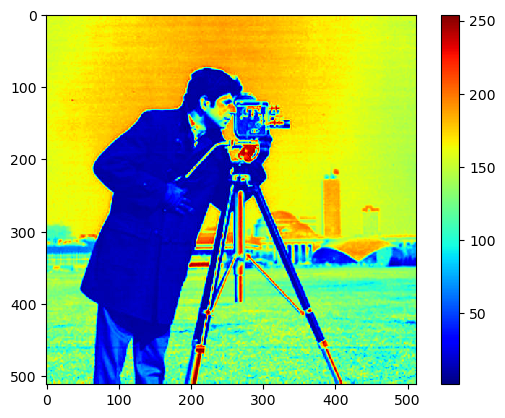

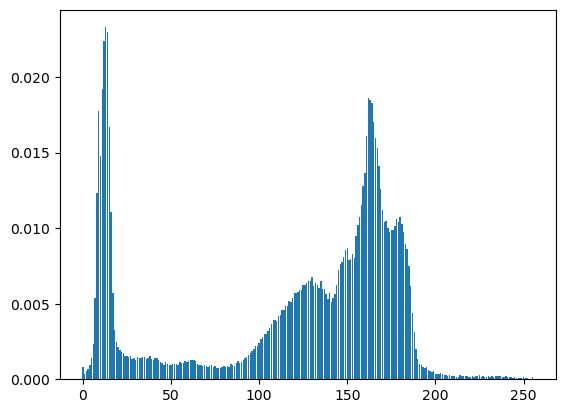

In [17]:
 def reconstruct(splitted_im):
    if (splitted_im.shape[0]%2!=0 or splitted_im.shape[1]%2!=0): return splitted_im

    midy = splitted_im.shape[0]//2 #REMINDER : shape[0] = y
    midx = splitted_im.shape[1]//2 #REMINDER : shape[1] = x
    
    a = reconstruct(splitted_im[:midy,:midx]) #En haut à gauche
    b = splitted_im[:midy,midx:] #En haut à droite
    c = splitted_im[midy:,:midx] #En bas à gauche
    d = splitted_im[midy:,midx:] #En bas à droite
    
    im_tmp = splitted_im.copy()
    im_tmp[::2,::2] = a
    im_tmp[::2,1::2] = b+a
    im_tmp[1::2,::2] = c+a
    im_tmp[1::2,1::2] = d+a
    
    #show_image(im_tmp)
    return im_tmp

reconstructed_im = reconstruct(s_recursive)
show_image(reconstructed_im)
norm_h = show_normalized_histogram(reconstructed_im)

**Need more help? You can check the following videos:**

* [Subsampling and rescaling](https://www.youtube.com/watch?v=rYNUby5bIlA&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=7)
* [Pyramid compression](https://www.youtube.com/watch?v=yrsyF8T5OAU&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=8)

## 5. Co-occurrence matrix

While the histogram of an image is independent of the position of the pixels, the co-occurrence matrix gives us information about their spatial distribution.

A co-occurrence matrix is computed for a given displacement, looking at the pair of values spatially separated by that displacement. The co-occurrence matrix is a square matrix, its size given by the number of possible values that a pixels can take in the image.

1. Compute de [cooccurrence matrix](https://en.wikipedia.org/wiki/Co-occurrence_matrix) for a chosen displacement $(\Delta x,\Delta y)$ (see [greycomatrix](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.greycomatrix) in scikit-image)
1. What is the entropy of the cooccurrence matrix ?
1. How does this entropy evolve if we increase the displacement ?

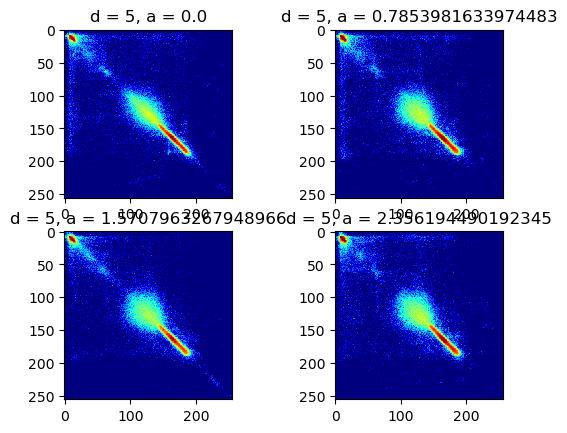

In [31]:
import skimage
from skimage.feature import greycomatrix
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.io import imread

def log_matrix(matrix):
    temp = matrix.copy()
    temp[temp==0] = 0.5
    return np.log(temp)

im = imread('camera.jpg')
def asmr_co_occurence(my_range,step):
    dy=0
    dx=0 
    for nbr in range(my_range):
        c = np.zeros((256,256)) #each pixel can get 256colors so we finish with a matrix of 256x256
        for y in range(im.shape[0]-dy): #image.shape[0]-dy's purpose is to avoid edges
            for x in range(im.shape[1]-dx): #image.shape[1]-dx's purpose is to avoid edges
                i = im[y,x]
                j = im[y+dy,x+dx]
                c[i,j] += 1
        
        dy+=step
        dx+=step
        
        #show_image(c)
        show_image(log_matrix(c)) #Allows to get even more contraste

#asmr_co_occurence(4,40)

distances= [5]
angles = [];

for i in range(4):
    angles.append((np.pi/4)*i)
co_matrices = log_matrix(skimage.feature.graycomatrix(im,distances,angles).astype('float'))

i=1
for idd,d in enumerate(distances):
    for ida,a in enumerate(angles):
        c = co_matrices[:,:,idd,ida]
        plt.subplot(2,2,i)
        plt.imshow(c,interpolation='nearest',cmap=cm.jet,vmin=c.min()+1, vmax=c.max()-1)
        plt.title("d = %d, a = %a"%(d,a))
        i+=1
plt.show()

**Need more help? You can check the following videos:**

* [Grayscale co-occurence matrix](https://www.youtube.com/watch?v=cq0Br3zB2AU&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=9)

## 6. Colour representations

A colour image is typically encoded with three channels: Red, Green and Blue. In the example below, we open the *immunohistochemistry()* example image and split it into the three channels, which we display: 

(512, 512, 3) uint8


<Figure size 640x480 with 0 Axes>

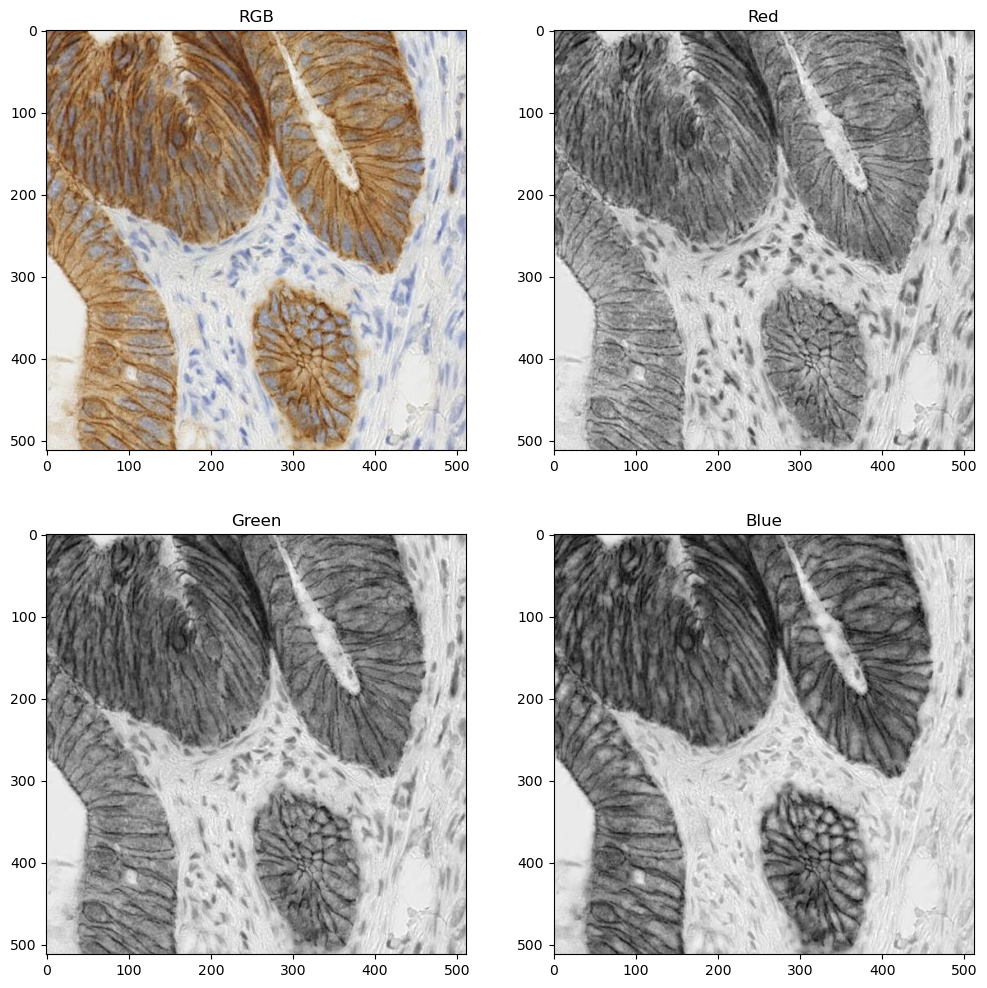

In [32]:
from skimage.data import immunohistochemistry
import matplotlib.pyplot as plt

im = immunohistochemistry() # scikit-image method to load the example image
print(im.shape,im.dtype)
r = im[:,:,0]
g = im[:,:,1]
b = im[:,:,2]

plt.gray() # Use grayscale by default on 1-channel images, so you don't have to add cmap=plt.cm.gray everytime

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(im)

plt.title('RGB')
plt.subplot(2,2,2)
plt.imshow(r)

plt.title('Red')
plt.subplot(2,2,3)
plt.imshow(g)

plt.title('Green')
plt.subplot(2,2,4)
plt.imshow(b)
plt.title('Blue')
plt.show()

1. Compute & show the color histograms
1. Convert the image to the HSV color space & compute the HSV histograms. [See the skimage documentation for reference on color transformation](http://scikit-image.org/docs/dev/api/skimage.color.html#rgb2hsv)
1. Find a method to isolate the brown cells in the immunohistochemistry image
    1. In the RGB space
    1. In the HSV space

In [24]:
#Ex1

im_norm_h = show_normalized_histogram(im)
r_norm_h = show_normalized_histogram(r)
g_norm_h = show_normalized_histogram(g)
b_norm_h = show_normalized_histogram(b)



NameError: name 'show_normalized_histogram' is not defined

**Need more help? You can check the following videos:**

* [RGB vs HSV](https://www.youtube.com/watch?v=oVpSTZtZQNM&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=10)
* [Distances: image space and colour space](https://www.youtube.com/watch?v=f6aJJldc38E&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=11)
* [Creating a Magic Wand](https://www.youtube.com/watch?v=Aw--_cJ7o5I&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=12)

# Coding Project - Watermark

Write code to automatically add a watermark to a photograph.

<img src='ex_wm.jpg' width="500px" />

## Main requirements

The minimum requirements are to:
* Add the white pixels from the watermark somewhere in the photograph.
* Save the resulting image as an image file & display it in the notebook

You may use the *watermark.png* file available in the GitHub repository, or choose/create your own.

## Additional requirements

(note: this is not an exhaustive list, use your imagination!)

* Add an option to choose the watermark location
* Add transparency effect to the watermark
* Determine if the watermark should be dark or light based on the luminosity of the image
* ...


(900, 1200, 3) int16


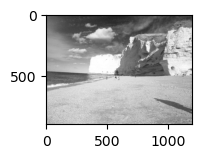

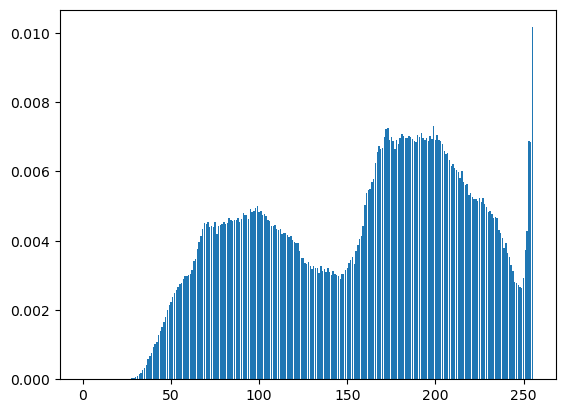

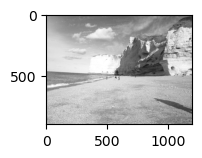

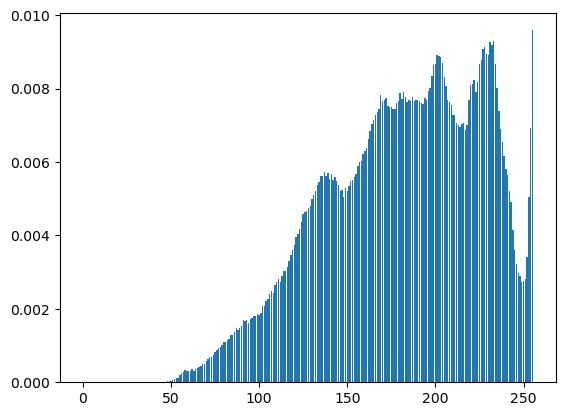

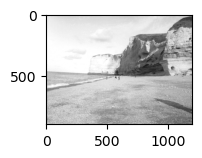

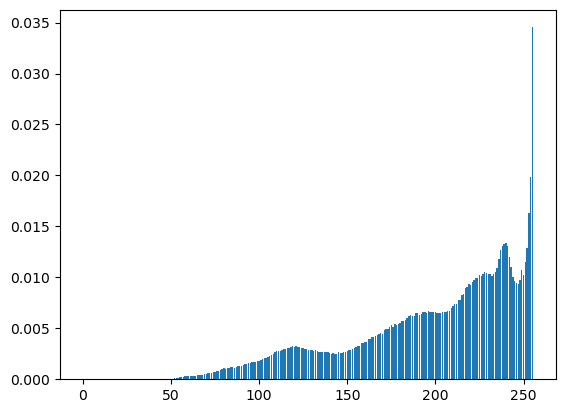

In [47]:
print(im.shape,im.dtype) #ici, on voit que im a comme (width=900,height=1200, COLOR_DIMENSION=3) et que le tout est codé en 16bits

"""
The RGB version:
On the following pictures, each dark/bright pixel means a the color is strong/weak.
So the water are strongly blue, so the blue channel will be kinda bright.
We also noticed that the pictures are similar, weach means that the mains colors are 'gray'
The probleme about the RGB interptretation is that a pixel is a combinaision of RGB wich makes it hard to imaginate (not natural).

"""
#Red Channel
plt.figure()
plt.subplot(1,3,1)
plt.imshow(im[:,:,0],plt.cm.gray)
snh0 = show_normalized_histogram(im[:,:,0])

#Green Channel
plt.figure()
plt.subplot(1,3,2)
plt.imshow(im[:,:,1],plt.cm.gray)
snh1 = show_normalized_histogram(im[:,:,1])

#Blue Channel
plt.figure()
plt.subplot(1,3,3)
plt.imshow(im[:,:,2],plt.cm.gray)
snh2 = show_normalized_histogram(im[:,:,2])


(900, 1200, 3) float64


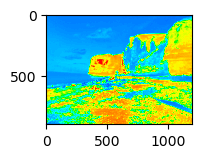

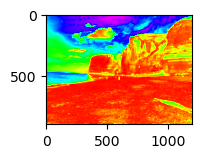

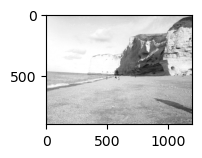

In [52]:
from skimage.color import rgb2hsv
"""
The HSV version:
If we combine the hsv/gray color pictures, we can determinate.
For the Red channel, we go trought the 'whole' spectrum.
For the Green channel, we go trought the 'whole' spectrum.


"""
hsv = rgb2hsv(im)
print(hsv.shape,hsv.dtype)

#Red Channel
plt.figure()
plt.subplot(1,3,1)
plt.imshow(hsv[:,:,0],plt.cm.hsv)
#snh0 = show_normalized_histogram(im[:,:,0])

#Green Channel
plt.figure()
plt.subplot(1,3,2)
plt.imshow(hsv[:,:,1],plt.cm.hsv)
#snh1 = show_normalized_histogram(im[:,:,1])

#Blue Channel
plt.figure()
plt.subplot(1,3,3)
plt.imshow(hsv[:,:,2],plt.cm.gray)
#snh2 = show_normalized_histogram(im[:,:,2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


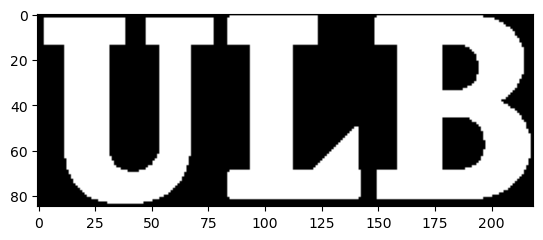

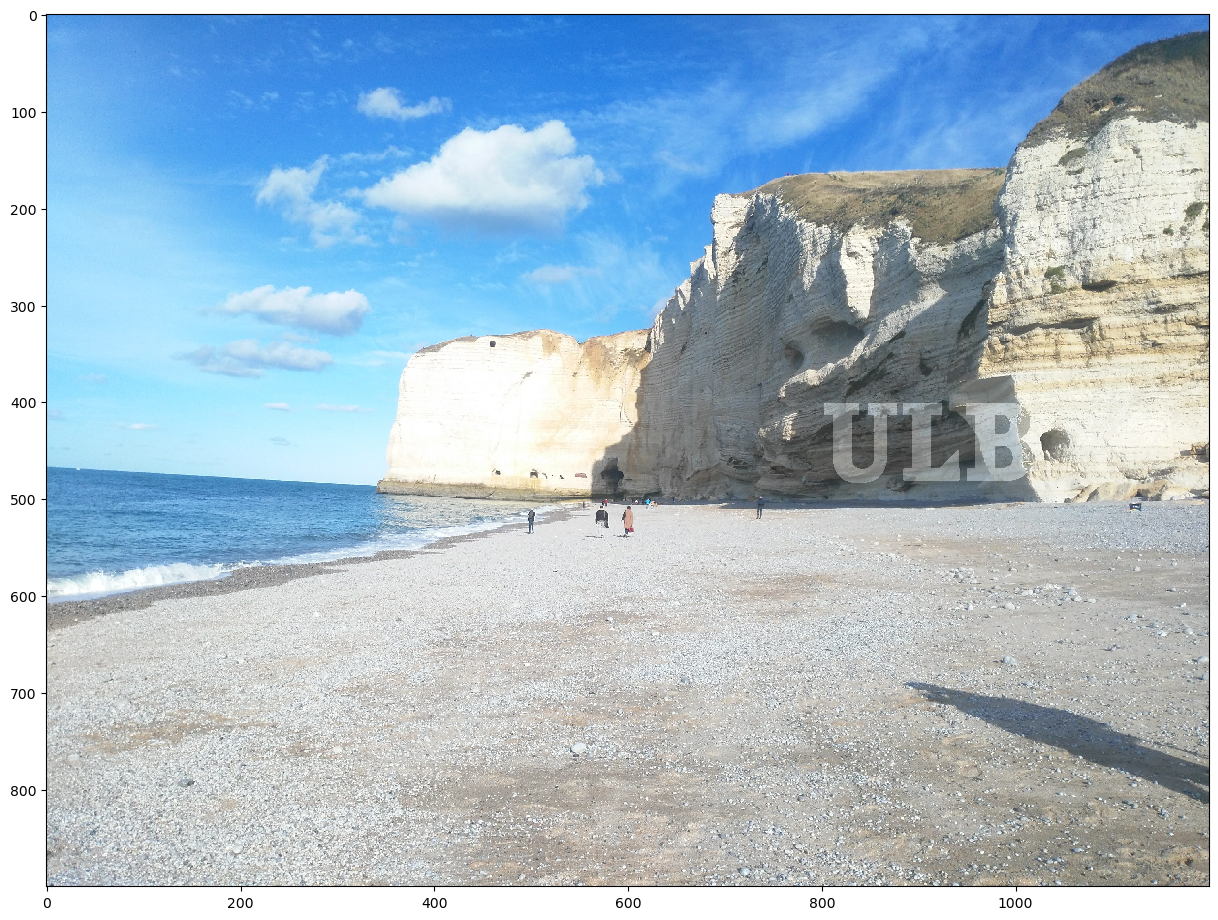

C:\Users\Sandra\AppData\Local\Temp\ipykernel_25932\2825450287.py:55: UserWarning: save.jpg is a low contrast image
  imsave('save.jpg',im_with_wm)
Lossy conversion from int16 to uint8. Range [1, 256]. Convert image to uint8 prior to saving to suppress this warning.


In [3]:
from skimage.io import imread,imsave,imshow
from skimage.color import rgb2hsv
from matplotlib.pyplot import cm

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


watermark = imread('watermark.png').astype('int16')
im = imread('etretat.jpg').astype('int16')
plt.imshow(watermark, cmap = cm.gray)

def add_watermark_to_image(image, watermark, center, opacity, dynamic_light=False) :
    """
    This function add the watermark based starting from the "center".
    """
    
    threshold = 0.6
    wy = watermark.shape[0] #longueur Y
    wx = watermark.shape[1] #longueur X
    
    im2 = image.copy()
    
    hsv = rgb2hsv(image) #Allows to work more easaly
    v = hsv[:,:,2]
    for i in range(wy) :
        for j in range(wx) :
            if(watermark[i,j] != 0) :
                brightness_darkness_factor = 1 # default value
                
                #  1 if the pixel is dark and need to get brighter, 
                # -1 if the pixel is bright and need to get darker
                
                if dynamic_light :
                    # Need to compute a good brightness threshold
                    if v[center[0] + i, center[1] + j]*100 >threshold:
                        brightness_darkness_factor = 1
                    else:
                        brightness_darkness_factor = -1
                im2[center[0] + i, center[1] + j] -= brightness_darkness_factor*opacity
    
    return im2



im_with_wm = add_watermark_to_image(im, watermark, (400, 800), 60, dynamic_light=True)
#im_with_other_wm = add_watermark_to_image(im_with_wm, watermark, (200, 200), 60, dynamic_light=True)

plt.figure(figsize=(15,15))
plt.imshow(im_with_wm,interpolation='nearest',cmap=cm.gray,vmin=0, vmax=255)
plt.show()

imsave('save.jpg',im_with_wm)
